# **Ensembling techniques**

In [1]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

print(preds1.mean(),preds2.mean(),preds3.mean(),preds4.mean(),preds5.mean())

0.699 0.698 0.71 0.699 0.685


Aproximadamente cada modelos tiene unba precision de un 70% aproximadamente por si solo. Veamos ahora esamblandolos promediando las prediciones y luego redondear a 0 o 1

In [2]:
ensable_pred = ((preds1 + preds2+preds3+preds4+preds5)/5)>=0.5
print(ensable_pred.mean())


0.83


A  medida que se añaden más modelos correctos a un proceso de votacion la probabilidad de error decrese y se conoce como **Condorcet's jury theorem (Teorema del jurado de Condorcet)**

# **Random Forest (example of Ensambling)**

> Intentemos predecir los salarios de los jugarores de la MLB basandodes en estadísticas del jugador

In [3]:
import pandas as pd

# read in the data
hitters = pd.read_csv('./resources/hitters.csv')

# remove rows with missing values
hitters.dropna(inplace=True)

# encode categorical variables as integers
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]

# # define features: exclude career statistics (which start with "C") and the response (Salary)
feature_cols = [h for h in hitters.columns if h[0] != 'C' and h != 'Salary']

# define X and y
X = hitters[feature_cols]
y = hitters.Salary

X.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,0,0,632,43,10,0
2,479,130,18,66,72,76,3,1,0,880,82,14,1
3,496,141,20,65,78,37,11,0,1,200,11,3,0


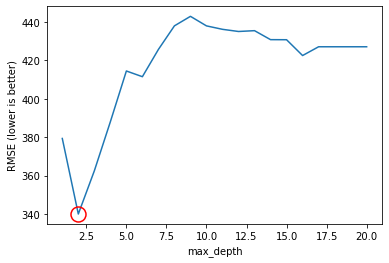

In [4]:
''' Let's try andpredict the salary first using a single decision tree'''

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
mean_scores = []

# use 10-fold cross-validation with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    RMSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_root_mean_squared_error')
    mean_scores.append(np.mean((-RMSE_scores)))

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, mean_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

plt.plot(max_depth_range.__getitem__(mean_scores.index(np.min(mean_scores))), np.min(
    mean_scores), 'ro', markerfacecolor='None', markeredgecolor='r', markersize=15, markeredgewidth=1.5)


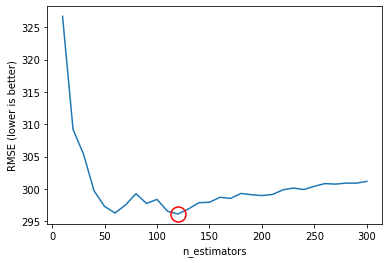

In [5]:
'''Let's do the same thing, but this time with a Random forest'''

from sklearn.ensemble import RandomForestRegressor

# list of values to try for n_estimators (numero de arboles en el bosque)
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
mean_scores = []
# use 5-fold cross-validation with each value of n_estimators
for estimator in estimator_range:

    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    RMSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_root_mean_squared_error')
    mean_scores.append(np.mean(-RMSE_scores))

plt.plot(estimator_range, mean_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

plt.plot(estimator_range.__getitem__(mean_scores.index(np.min(mean_scores))), np.min(
    mean_scores), 'ro', markerfacecolor='None', markeredgecolor='r', markersize=15, markeredgewidth=1.5)


Como podemos ver nuestro eje y ahora e smucho mas bajo y por lo tanto nuestro RMSE. Lo que evidencia como podemos obtener un importante aumento del poder predictivo usandp **random Forest** 

Como ya sabemos **las características siempre se permutan aleatoriamente en cada división**. Por lo tanto, la división mejor encontrada puede variar, incluso con los mismos datos de entrenamiento,si  max_features=n_features y bootstrap=Falses la mejora del criterio es idéntica para varias divisiones enumeradas durante la búsqueda de la mejor división.

In [6]:
'''Caracteriristicas importantes'''

# n_estimators=150 is sufficiently good
from weakref import ref


rfreg = RandomForestRegressor(n_estimators=130, random_state=1)
rfreg.fit(X, y)
print(rfreg.predict(X.head()))
# compute feature importances
pd.DataFrame(
    {'feature': feature_cols, 'importance': rfreg.feature_importances_}).sort_values(
    'importance', ascending=False)


[537.12179231 556.0967     599.7628     110.88076923 740.54945385]


,feature,importance
6,Years,0.262278
5,Walks,0.150753
4,RBI,0.136988
1,Hits,0.133977
0,AtBat,0.094543
9,PutOuts,0.061853
3,Runs,0.056775
2,HmRun,0.039288
11,Errors,0.025531
10,Assists,0.023695


# **Neutral Networks**

(1797, 8, 8)

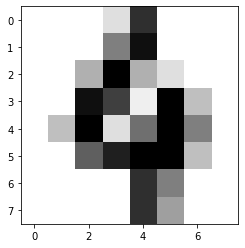

In [53]:
'''Conjunto de datos de digitos escritos a mano'''

from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()
# a 4 digi
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')
digits.images.shape

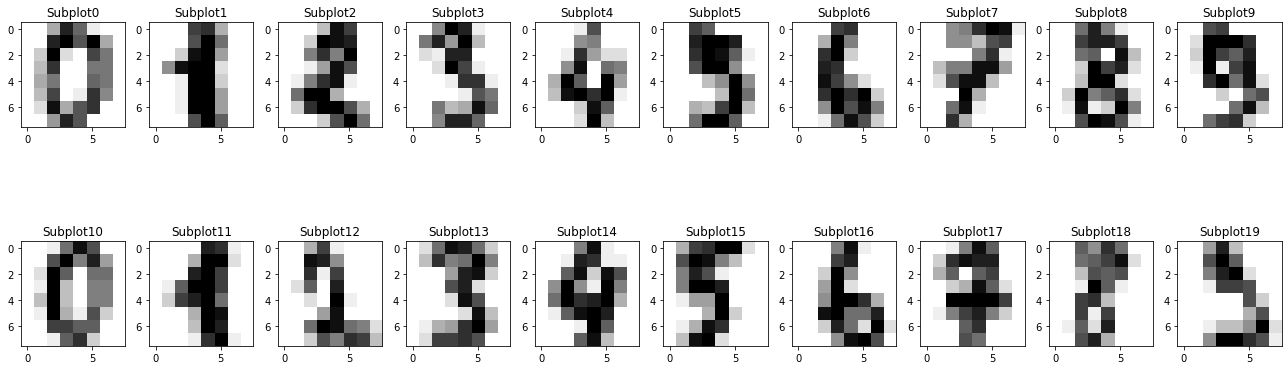

In [8]:
'''moestrar una muestra de las imagenes'''
import matplotlib.pyplot as plt

rows = 2
cols = 10
axes=[]
fig=plt.figure(figsize=(18,7))

for i in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[i].set_title("Subplot"+str(i))
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

fig.tight_layout()    
plt.show()

In [9]:
'''Usaremos primero Random Forest para realizar la prediccion'''

from sklearn.ensemble import RandomForestClassifier

X, y = digits.data, digits.target  # 64 pixels per image


# Try Random Forest
rfclf = RandomForestClassifier(n_estimators=100, random_state=1)
cross_val_score(rfclf, X, y, cv=5, scoring='accuracy').mean()

# example of prediction:
# rfclf.fit(X[10:], y[10:])
# print(rfclf.score(X[:10],y[:10]))
# rfclf.predict(X[:10])


0.938243577839678

Una poder predictivo de casi un 94% no esta nda mal, veamos si podemos mejorarlo con **Neutral Networks** siguiendo estos pasos:

Importing required PyBrain and other packages
Create ClassificationDataSet
Splitting the datasets 25% as testdata and 75% as trained data
Converting Testdata and Trained data back as ClassificationDataSet
Creating a Neural Network
Training the Network
Visualizing the error and validation data
Percentage for test data Error

In [28]:
'''preparar los datos para la red neuronal'''
from pybrain.datasets import ClassificationDataSet
from numpy import ravel  # Devuelve una matriz aplanada contigua.

# Paso 2. El siguiente paso es crear ClassificationDataSet.

# pybrain tiene su propia clase de datos de muestra a la que debemos añadir nuestros datos
# de entrenamiento y prueba

ds = ClassificationDataSet(64, 1, nb_classes=10)
for k in range(len(X)):
    ds.appendLinked(ravel(X[k]), y[k])


# Paso 3. their equivalent of train test split

test_data_temp, training_data_temp = ds.splitWithProportion(0.25)

# Paso 4. convertir los datos de prueba y de entrenamiento en ClassificationDataSet

test_data = ClassificationDataSet(64, 1, nb_classes=10)
for n in range(0, test_data_temp.getLength()):
    test_data.addSample(test_data_temp.getSample(n)[0], test_data_temp.getSample(n)[1])

training_data = ClassificationDataSet(64, 1, nb_classes=10)
for n in range(0, training_data_temp.getLength()):
    training_data.addSample(training_data_temp.getSample(n)[0], training_data_temp.getSample(n)[1])

# pybrain's version of dummy variables: Al realizar la clasificación, muchos algoritmos
# funcionan mejor si las clases se codifican en una unidad de salida por clase
test_data._convertToOneOfMany()
training_data._convertToOneOfMany()


print('una muestra de las var_respuesta despues de codificadas: \n',
      test_data.getField('target')[:5])

print(test_data.indim)  # number of pixels going in 64
print(test_data.outdim)  # number of possible options (10 digits)


una muestra de las var_respuesta despues de codificadas: 
 [[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
64
10


Total error:  0.0495151296269
Total error:  0.0295440154843
Total error:  0.0206550649974
Total error:  0.0157898702665
Total error:  0.0122603470116
Total error:  0.0105269798227
Total error:  0.00859461634632
Total error:  0.00734094590488
Total error:  0.00648199875364
Total error:  0.00555456496397
Total error:  0.00480646724007
('train-errors:', '[0.049515 , 0.029544 , 0.020655 , 0.01579  , 0.01226  , 0.010527 , 0.008595 , 0.007341 , 0.006482 , 0.005555 , 0.004806 ]')
('valid-errors:', '[0.074359 , 0.037831 , 0.025221 , 0.018949 , 0.014463 , 0.013925 , 0.01207  , 0.010479 , 0.009953 , 0.008689 , 0.007142 , 0.007098 ]')


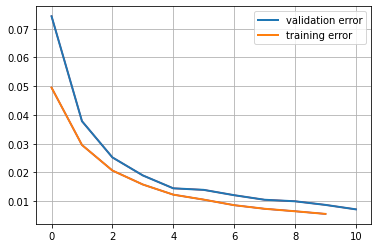

In [61]:
from pybrain.utilities import percentError
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer

# Paso 5. Create a Neural Network.

# Create the network of 64 inputs(uno por cada caracteristica),
# 64 Layers-capas hidden and 10 output(una por cada prediccion).
fnn = buildNetwork(training_data.indim, 64, training_data.outdim, outclass=SoftmaxLayer)

# Paso 6. Entrenando la Red

trainer = BackpropTrainer(fnn, dataset=training_data, momentum=0.1,
                          learningrate=0.01, verbose=True, weightdecay=0.01)

# Step 7  The next step is visualizing the error and validation of the data.

# se entrena como máximo maxEpochs cantidad de épocas
trnerr, valerr = trainer.trainUntilConvergence(dataset=training_data, maxEpochs=10)

fig, ax = plt.subplots()
ax.plot(trnerr, 'b', valerr, 'r')
ax.plot(valerr,  lw=2, label='validation error')
ax.plot(trnerr,  lw=2, label='training error')
ax.legend(loc='upper right')
plt.grid()


El error comienza en 0.04 y luego disminuye para cada época, lo que significa que la red se está entrenando y mejora para cada época.

In [59]:
# Paso 8. Porcentaje de error de datos de prueba

# metodo para entrenar el BackpropTrainer en este caso con 10 iteraciones
trainer.trainEpochs(10)  # 10 batches o lotes

# el campo adicional "class", que es una copia de seguridad automática de las respuestas
err = percentError(trainer.testOnClassData(dataset=test_data), test_data['class'])
print('Percent Error on Test dataset: ', err)
print('accuracy', 100 - err)


Total error:  0.00211275914217
Total error:  0.00211515814725
Total error:  0.00232309614627
Total error:  0.00214791898058
Total error:  0.00216841548728
Total error:  0.00212797250637
Total error:  0.0021502055373
Total error:  0.00197460492244
Total error:  0.00207040891784
Total error:  0.00227533611033
Percent Error on Test dataset:  2.89532293986637
accuracy 97.10467706013362


Como podemos ver los errores ya comienzan en 0.002 pq la red fue entrenada ya con el metodo **trainUntilConvergence** 

matiz de probabilidad para cada clasificacion


array([9.31680899e-01, 6.88980137e-04, 4.17230561e-03, 4.58522773e-03,
       2.61690533e-03, 8.86429201e-03, 9.69266067e-03, 5.19172635e-03,
       6.08632315e-03, 2.64206800e-02])

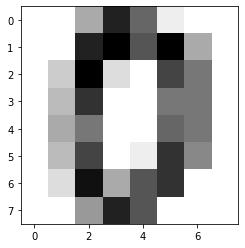

In [62]:
'''To predict the shape, we can use the following code'''
plt.imshow(digits.images[0], cmap=plt.cm.gray_r,interpolation='nearest')
print('matiz de probabilidad para cada clasificacion')
fnn.activate(X[0])

Y como vemos la mayor probabilidad la tiene el 0 con 93% y luego le sigue el 9 con un 2%. Si volvemos a ejecutar el mismo codigo de crear y entrenar el modelo obtendremosm una red diferente a la anteriorcon un % alto pero diferente de precisión. Y esto es sintomas de **varianza alta** y es por eso que requieren muchas muestras de entrenamiento para combatir esta alta varianza.